# ***Clustering Assignment Questions***

1. What is unsupervised learning?

* Unsupervised learning finds hidden patterns in data without labeled outputs. It is mainly used for clustering, dimensionality reduction, and anomaly detection.

2. How does K-Means work?

* K-Means randomly initializes centroids, assigns points to the nearest centroid, updates centroids as means, and repeats until convergence.

3. Dendrogram in hierarchical clustering

* A dendrogram is a tree-like diagram showing how clusters merge or split at different distance levels.

4. Difference between K-Means and Hierarchical Clustering

* K-Means requires predefined k and is iterative, while hierarchical clustering builds a tree structure and doesn’t require k initially.

5. Advantages of DBSCAN over K-Means

* DBSCAN handles arbitrary-shaped clusters, detects noise, and doesn’t require specifying the number of clusters.

6. When to use Silhouette Score?

* Use it to evaluate clustering quality by measuring how well points fit within their cluster compared to others.

7. Limitations of Hierarchical Clustering

* It is computationally expensive, sensitive to noise, and cannot easily correct early wrong merges.

8. Why feature scaling is important?

* Distance-based algorithms like K-Means are sensitive to feature magnitude; scaling prevents bias toward larger-valued features.

9. How does DBSCAN identify noise?

* Points with fewer than min_samples neighbors within distance eps are labeled as noise.

10. Define inertia in K-Means

* Inertia is the sum of squared distances between points and their assigned cluster centroids.

11. Elbow method

* It plots inertia vs. number of clusters; the “elbow point” indicates an optimal k.

12. Density in DBSCAN

* Density refers to the number of points within a neighborhood (eps) around a point.

13. Hierarchical clustering on categorical data?

* Yes, but only after converting categories into numeric representations and using suitable distance metrics.

14. Negative Silhouette Score

* It indicates poor clustering where samples are closer to other clusters than their own.

15. Linkage criteria

* It defines how distances between clusters are calculated (single, complete, average, ward).

16. Why K-Means fails with varying densities?

* It assumes spherical, equally sized clusters and struggles with uneven density or size.

17. Core parameters of DBSCAN

* eps: neighborhood radius

* min_samples: minimum points to form a dense region

18. K-Means++ improvement

* It initializes centroids far apart, leading to faster convergence and better clustering.

19. Agglomerative clustering

* A bottom-up hierarchical method where each point starts as a cluster and merges progressively.

20. Why Silhouette > inertia?

* Silhouette considers both cohesion and separation, while inertia only measures compactness.



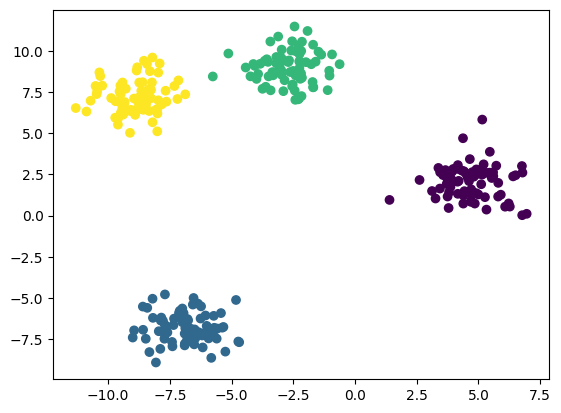

In [1]:
#21 Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


In [2]:
#22 Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels

from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

X = load_iris().data
model = AgglomerativeClustering(n_clusters=3)
labels = model.fit_predict(X)
print(labels[:10])


[1 1 1 1 1 1 1 1 1 1]


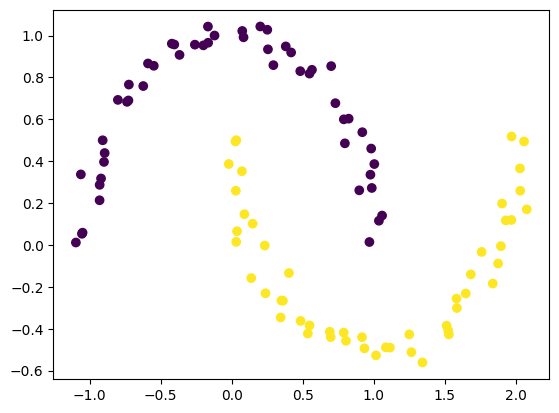

In [3]:
#23 Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, _ = make_moons(noise=0.05)
labels = DBSCAN(eps=0.3).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


In [5]:
#24 Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster

import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load & scale data
X = StandardScaler().fit_transform(load_wine().data)

# Apply KMeans
labels = KMeans(n_clusters=3, random_state=42)
labels = labels.fit_predict(X)

# Print cluster sizes
print(pd.Series(labels).value_counts())


0    65
2    62
1    51
Name: count, dtype: int64


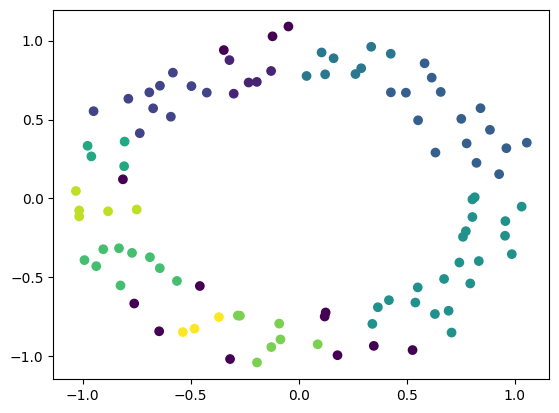

In [6]:
#25 Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result

from sklearn.datasets import make_circles

X,_ = make_circles(noise=0.05)
labels = DBSCAN(eps=0.2).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

In [7]:
#26 Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(load_breast_cancer().data)
model = KMeans(n_clusters=2).fit(X)
print(model.cluster_centers_)


[[0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]
 [0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]]


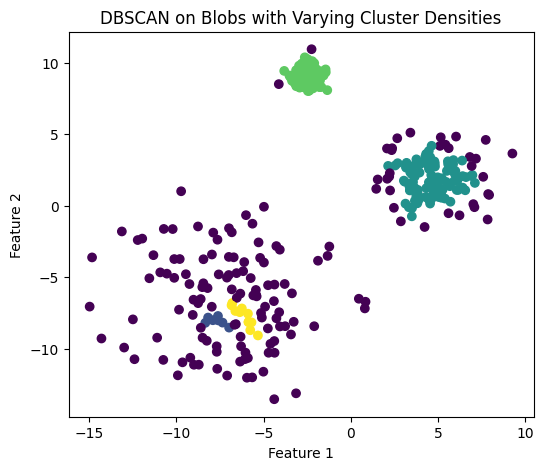

In [10]:
#27 Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

X, _ = make_blobs(
    n_samples=400,
    centers=3,
    cluster_std=[0.5, 1.5, 3.0],  # varying densities
    random_state=42
)

dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("DBSCAN on Blobs with Varying Cluster Densities")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

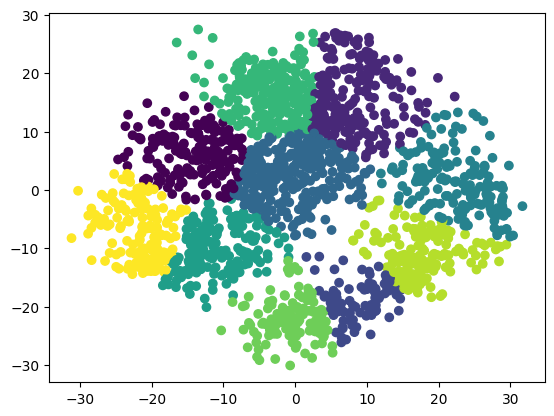

In [11]:
#28 Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

X = PCA(2).fit_transform(load_digits().data)
labels = KMeans(10).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


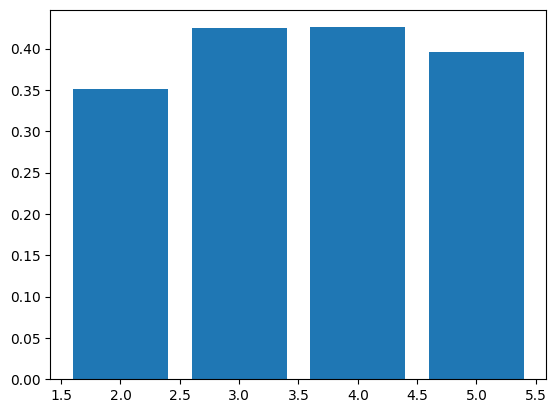

In [12]:
#29 Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart

from sklearn.metrics import silhouette_score

scores = []
for k in range(2,6):
    scores.append(silhouette_score(X, KMeans(k).fit_predict(X)))
plt.bar(range(2,6), scores)
plt.show()


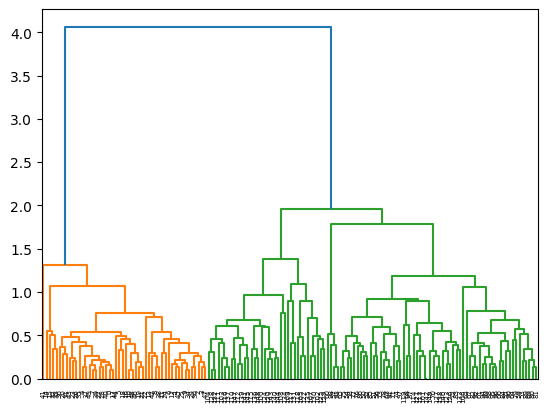

In [13]:
#30 Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage

from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(load_iris().data, method='average')
dendrogram(Z)
plt.show()


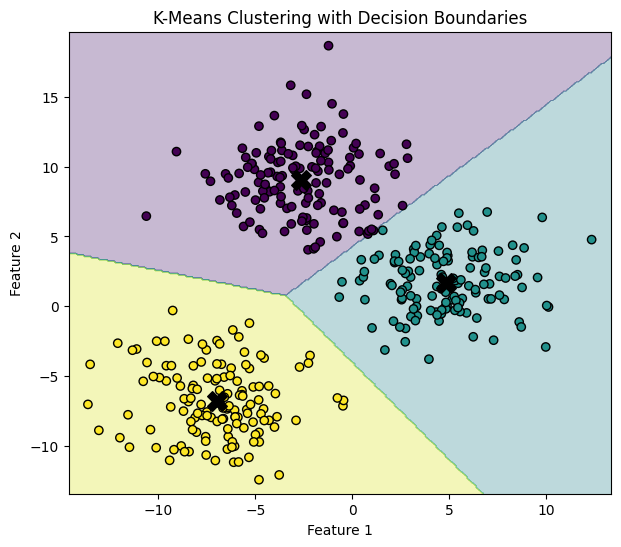

In [15]:
#31 Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(
    n_samples=400,
    centers=3,
    cluster_std=2.5,   # large std → overlapping clusters
    random_state=42
)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7, 6))

# Decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3)

# Data points
plt.scatter(X[:, 0], X[:, 1], c=labels, edgecolor='k')

# Centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    marker='X',
    c='black'
)

plt.title("K-Means Clustering with Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


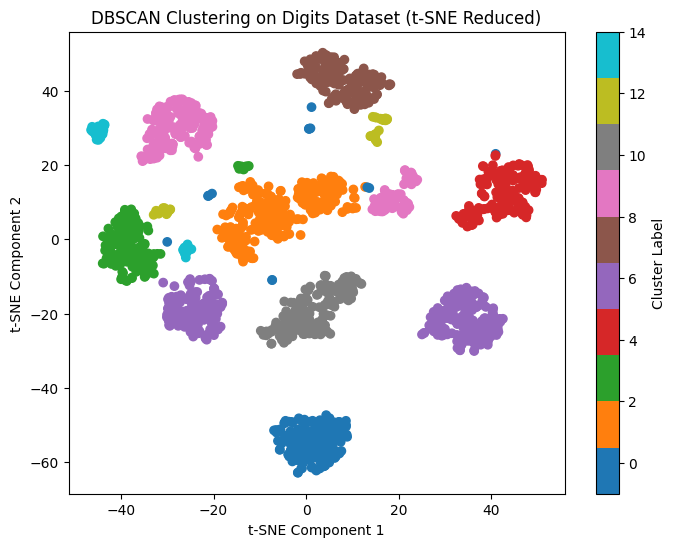

In [16]:
#32 Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

digits = load_digits()
X = digits.data

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

dbscan = DBSCAN(eps=3, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10')
plt.title("DBSCAN Clustering on Digits Dataset (t-SNE Reduced)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="Cluster Label")
plt.show()

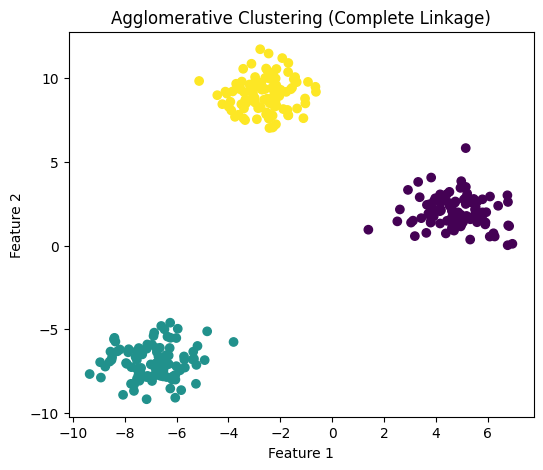

In [17]:
#33 Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X, _ = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=1.0,
    random_state=42
)

agglo = AgglomerativeClustering(
    n_clusters=3,
    linkage='complete'
)
labels = agglo.fit_predict(X)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

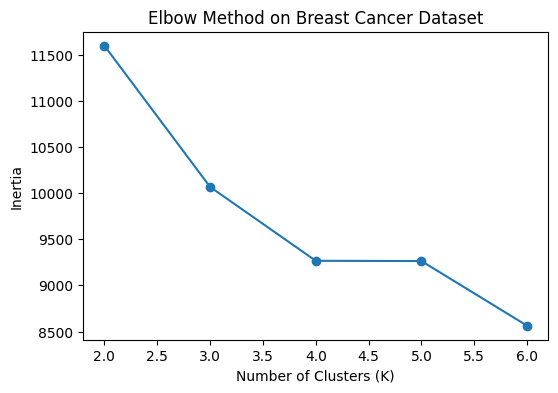

In [18]:
#34 Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = load_breast_cancer()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia_values = []

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(2, 7), inertia_values, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method on Breast Cancer Dataset")
plt.show()

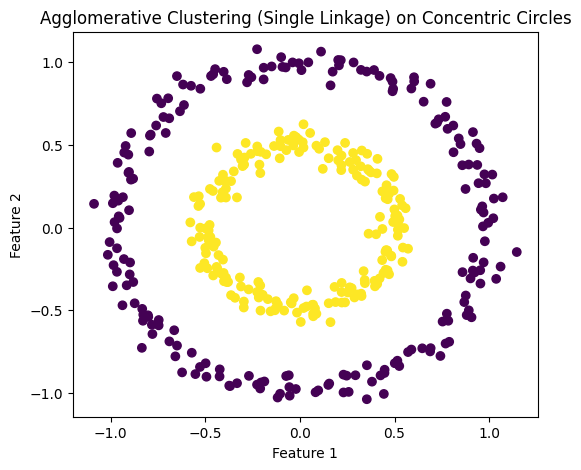

In [19]:
#35 Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering

X, _ = make_circles(
    n_samples=400,
    noise=0.05,
    factor=0.5,
    random_state=42
)

agglo = AgglomerativeClustering(
    n_clusters=2,
    linkage='single'
)
labels = agglo.fit_predict(X)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Agglomerative Clustering (Single Linkage) on Concentric Circles")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [20]:
#36 Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise6

import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

wine = load_wine()
X = wine.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# DBSCAN labels noise as -1
unique_labels = set(labels)

num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
print("Number of clusters (excluding noise):", num_clusters)


Number of clusters (excluding noise): 0


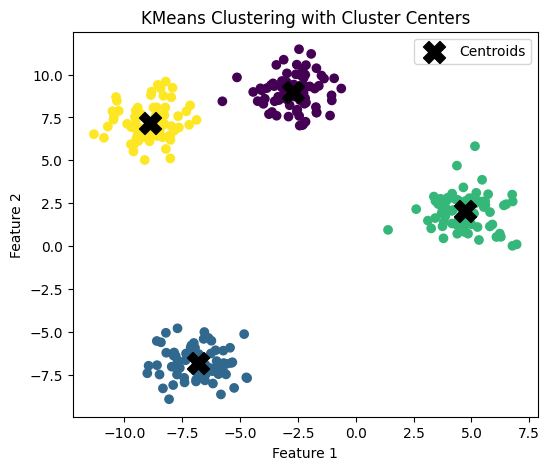

In [21]:
#37 Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=1.0,
    random_state=42
)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

plt.figure(figsize=(6, 5))

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=labels)

# Plot cluster centers
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=250,
    marker='X',
    c='black',
    label='Centroids'
)

plt.title("KMeans Clustering with Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [22]:
#38 Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

iris = load_iris()
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

noise_count = list(labels).count(-1)
print("Number of noise samples identified:", noise_count)

Number of noise samples identified: 34


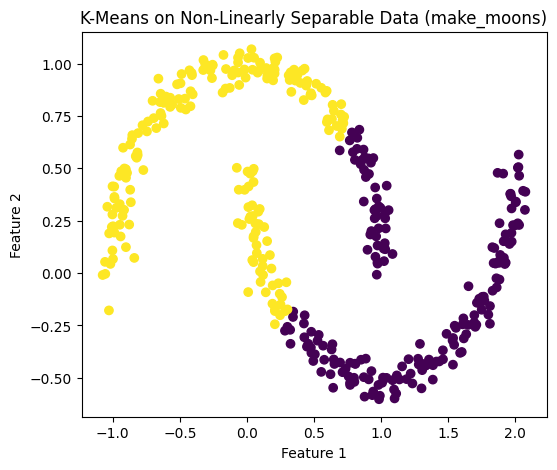

In [23]:
#39 Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

X, _ = make_moons(
    n_samples=400,
    noise=0.05,
    random_state=42
)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("K-Means on Non-Linearly Separable Data (make_moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Original data shape: (1797, 64)
Shape after PCA: (1797, 3)


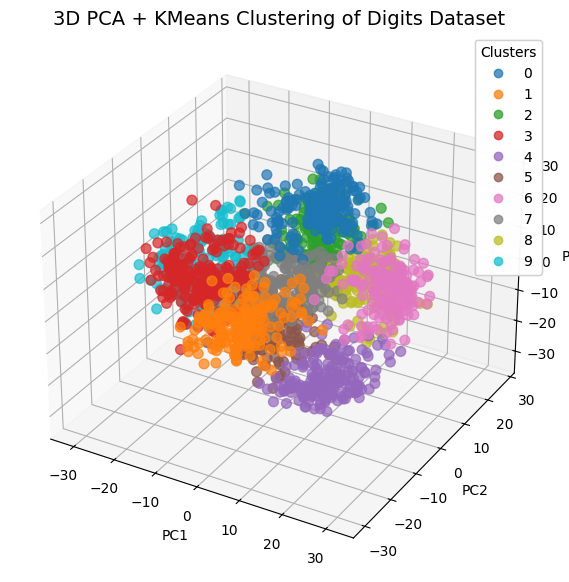

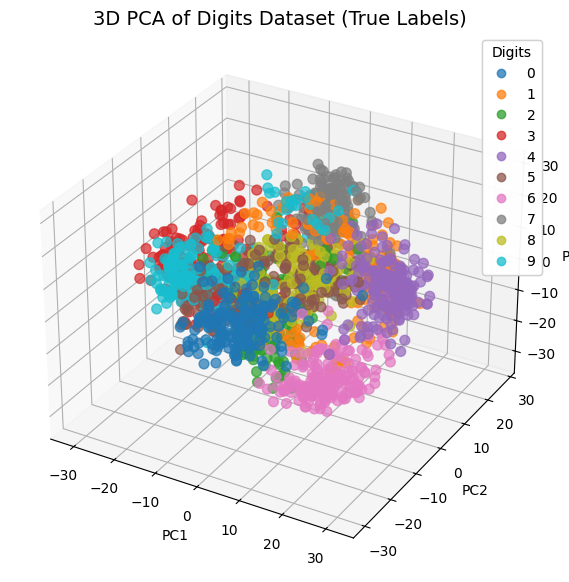

In [25]:
#40 Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

digits = load_digits()
X = digits.data
y = digits.target
print("Original data shape:", X.shape)

pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)
print("Shape after PCA:", X_pca.shape)

kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_pca)

df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df['Cluster'] = clusters
df['TrueLabel'] = y
df.head()

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['PC1'], df['PC2'], df['PC3'],
                     c=df['Cluster'], cmap='tab10', s=50, alpha=0.7)

ax.set_title("3D PCA + KMeans Clustering of Digits Dataset", fontsize=14)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')

scatter_true = ax.scatter(df['PC1'], df['PC2'], df['PC3'],
                          c=df['TrueLabel'], cmap='tab10', s=50, alpha=0.7)

ax.set_title("3D PCA of Digits Dataset (True Labels)", fontsize=14)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

legend2 = ax.legend(*scatter_true.legend_elements(), title="Digits")
ax.add_artist(legend2)

plt.show()


Shape of generated data: (500, 2)
Silhouette Score for KMeans clustering: 0.6787


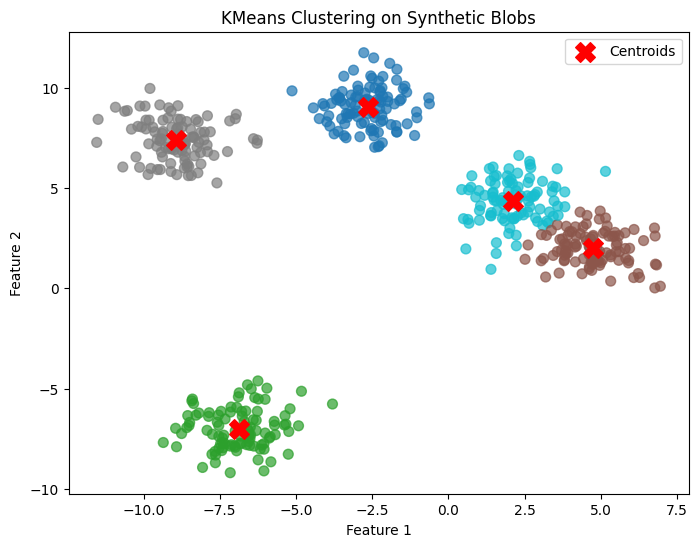

In [26]:
#41 Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering

# 1️⃣ Import libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 2️⃣ Generate synthetic blobs
X, y_true = make_blobs(n_samples=500,      # total samples
                       n_features=2,       # 2D features for easy visualization
                       centers=5,          # 5 clusters
                       cluster_std=1.0,    # standard deviation
                       random_state=42)

print("Shape of generated data:", X.shape)

# 3️⃣ Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)

# 4️⃣ Evaluate clustering using silhouette score
score = silhouette_score(X, clusters)
print(f"Silhouette Score for KMeans clustering: {score:.4f}")

# 5️⃣ Visualize the clusters
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='tab10', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='red', marker='X', s=200, label='Centroids')
plt.title("KMeans Clustering on Synthetic Blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


Original data shape: (569, 30)
Shape after PCA: (569, 2)


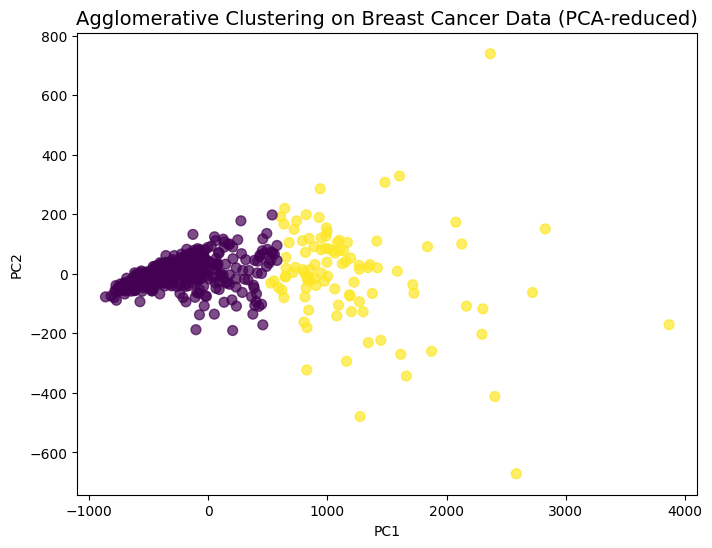

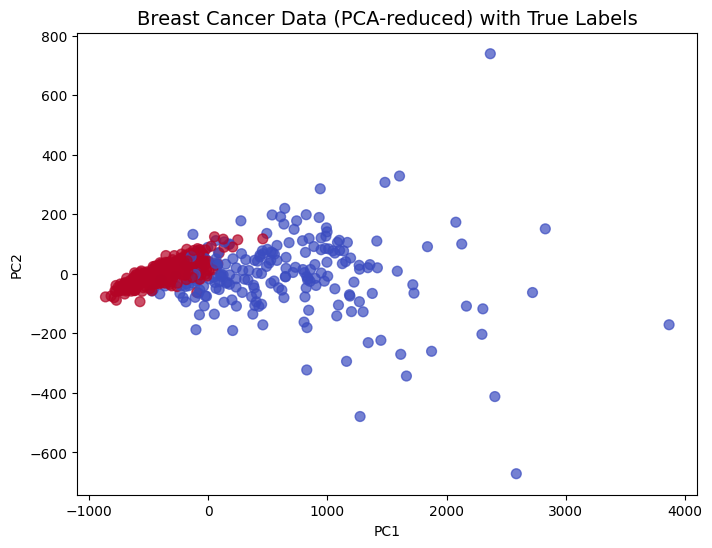

In [27]:
#42 Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D

# 1️⃣ Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# 2️⃣ Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y_true = data.target  # 0 = malignant, 1 = benign
print("Original data shape:", X.shape)

# 3️⃣ Reduce dimensionality with PCA (2 components for 2D visualization)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
print("Shape after PCA:", X_pca.shape)

# 4️⃣ Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2)  # Breast cancer dataset has 2 classes
clusters = agglo.fit_predict(X_pca)

# 5️⃣ Prepare DataFrame for visualization
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['Cluster'] = clusters
df['TrueLabel'] = y_true
df.head()

# 6️⃣ 2D Scatter plot: Clusters from Agglomerative Clustering
plt.figure(figsize=(8,6))
plt.scatter(df['PC1'], df['PC2'], c=df['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title("Agglomerative Clustering on Breast Cancer Data (PCA-reduced)", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# 7️⃣ Optional: 2D Scatter plot with True Labels
plt.figure(figsize=(8,6))
plt.scatter(df['PC1'], df['PC2'], c=df['TrueLabel'], cmap='coolwarm', s=50, alpha=0.7)
plt.title("Breast Cancer Data (PCA-reduced) with True Labels", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


Data shape: (500, 2)


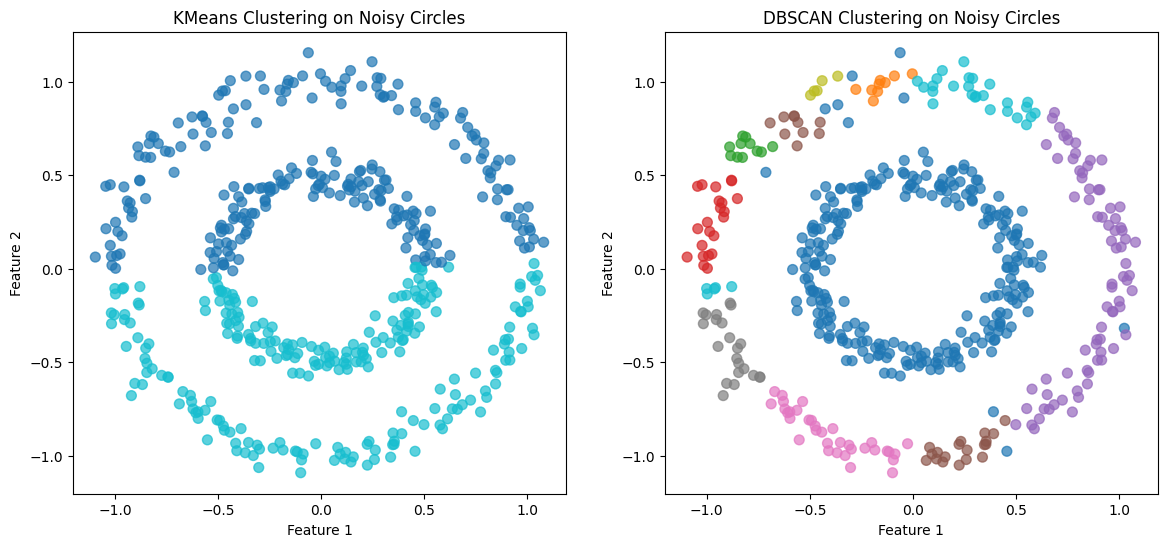

In [28]:
#43 Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side

# 1️⃣ Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import numpy as np

# 2️⃣ Generate noisy circular data
X, y_true = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)
print("Data shape:", X.shape)

# 3️⃣ Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# 4️⃣ Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# 5️⃣ Visualize side-by-side
fig, axs = plt.subplots(1, 2, figsize=(14,6))

# KMeans plot
axs[0].scatter(X[:,0], X[:,1], c=kmeans_labels, cmap='tab10', s=50, alpha=0.7)
axs[0].set_title("KMeans Clustering on Noisy Circles")
axs[0].set_xlabel("Feature 1")
axs[0].set_ylabel("Feature 2")

# DBSCAN plot
# DBSCAN labels -1 are noise points
axs[1].scatter(X[:,0], X[:,1], c=dbscan_labels, cmap='tab10', s=50, alpha=0.7)
axs[1].set_title("DBSCAN Clustering on Noisy Circles")
axs[1].set_xlabel("Feature 1")
axs[1].set_ylabel("Feature 2")

plt.show()


Data shape: (150, 4)
Average Silhouette Score: 0.5512


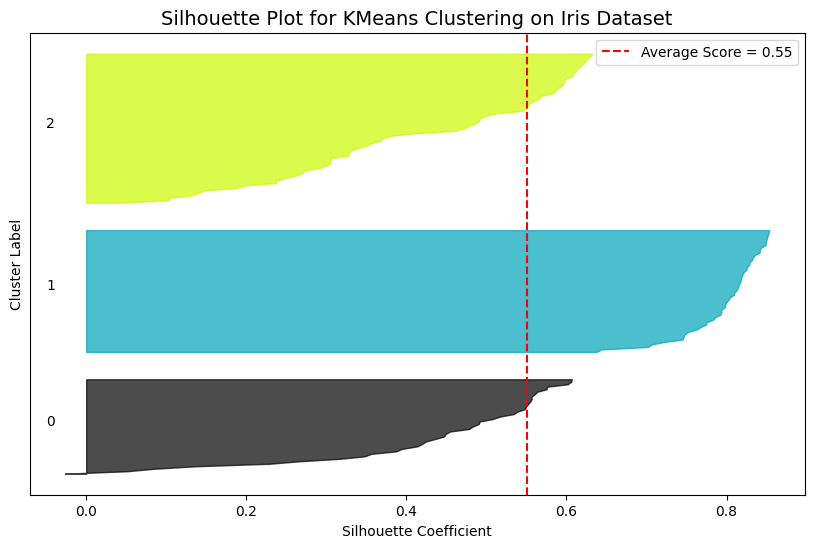

In [29]:
#44 Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering

# 1️⃣ Import libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# 2️⃣ Load the Iris dataset
iris = load_iris()
X = iris.data
y_true = iris.target
print("Data shape:", X.shape)

# 3️⃣ Apply KMeans clustering
n_clusters = 3  # Iris dataset has 3 classes
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# 4️⃣ Compute silhouette scores for each sample
silhouette_vals = silhouette_samples(X, cluster_labels)
avg_score = silhouette_score(X, cluster_labels)
print(f"Average Silhouette Score: {avg_score:.4f}")

# 5️⃣ Silhouette Plot
fig, ax = plt.subplots(figsize=(10,6))
y_lower = 10

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples in cluster i
    ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_vals.sort()

    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_vals,
                     facecolor=color, edgecolor=color, alpha=0.7)

    # Label the cluster in the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for spacing between clusters

ax.set_title("Silhouette Plot for KMeans Clustering on Iris Dataset", fontsize=14)
ax.set_xlabel("Silhouette Coefficient")
ax.set_ylabel("Cluster Label")
ax.axvline(x=avg_score, color="red", linestyle="--", label=f"Average Score = {avg_score:.2f}")
ax.set_yticks([])  # Clear y-axis ticks
ax.legend()
plt.show()


Shape of generated data: (400, 2)


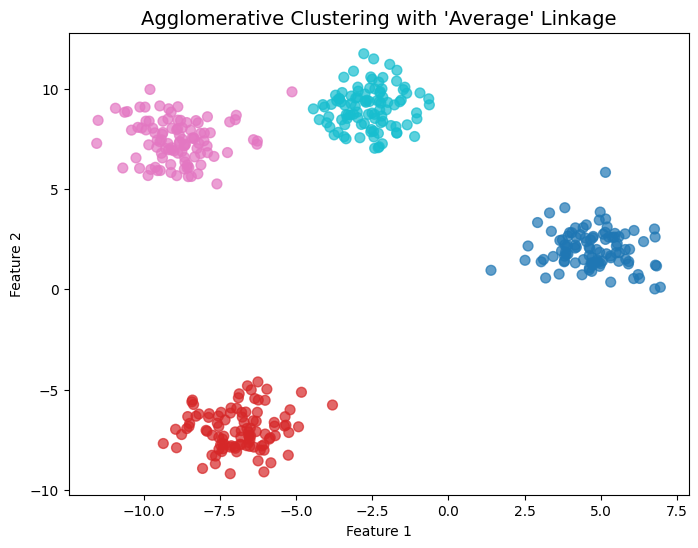

In [30]:
#45 Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters

# 1️⃣ Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# 2️⃣ Generate synthetic blobs
X, y_true = make_blobs(n_samples=400, n_features=2, centers=4, cluster_std=1.0, random_state=42)
print("Shape of generated data:", X.shape)

# 3️⃣ Apply Agglomerative Clustering with 'average' linkage
agglo = AgglomerativeClustering(n_clusters=4, linkage='average')
cluster_labels = agglo.fit_predict(X)

# 4️⃣ Visualize the clusters
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=cluster_labels, cmap='tab10', s=50, alpha=0.7)
plt.title("Agglomerative Clustering with 'Average' Linkage", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Data shape: (178, 13)


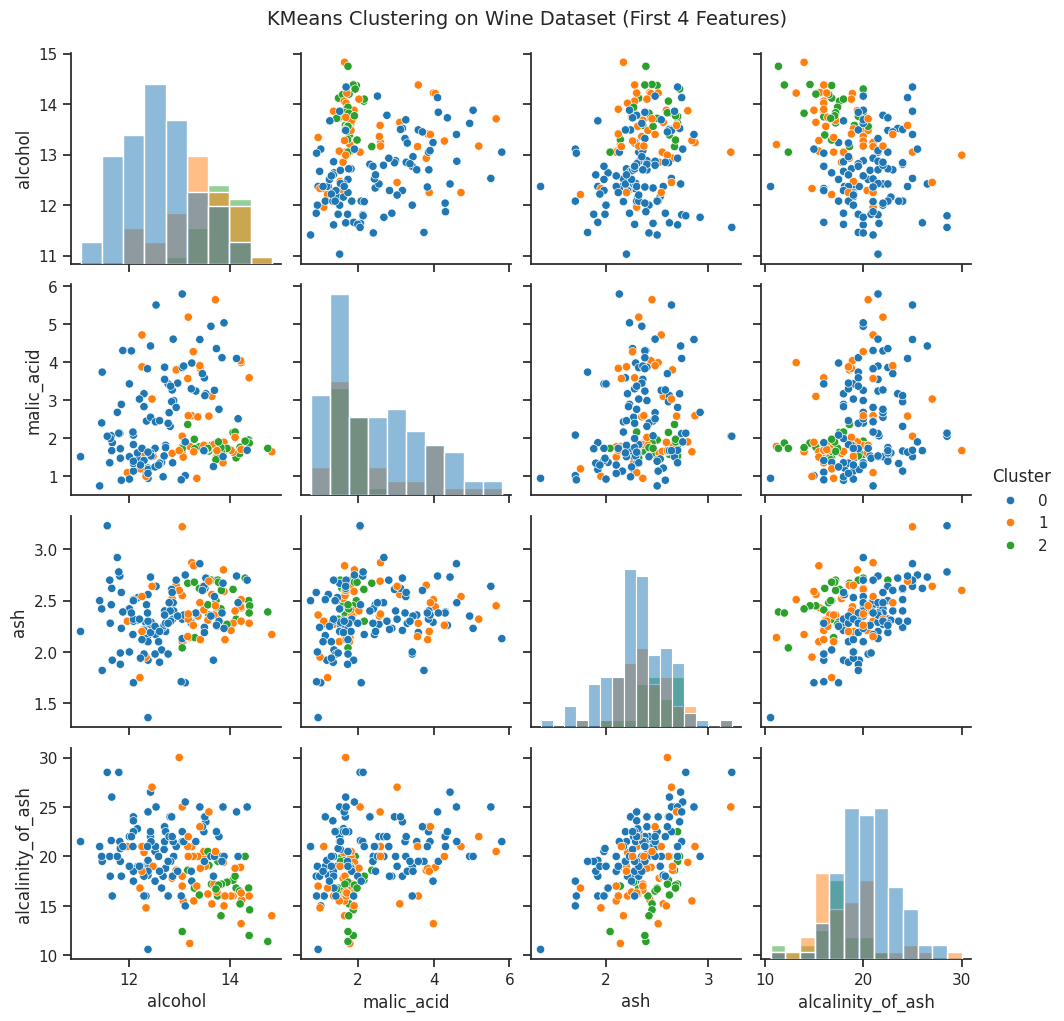

In [31]:
#45 Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features)

# 1️⃣ Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

# 2️⃣ Load Wine dataset
wine = load_wine()
X = wine.data
y_true = wine.target
feature_names = wine.feature_names

# Create DataFrame for easier handling
df = pd.DataFrame(X, columns=feature_names)
print("Data shape:", df.shape)
df.head()

# 3️⃣ Apply KMeans clustering
n_clusters = 3  # Wine dataset has 3 classes
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

# 4️⃣ Select the first 4 features for pairplot
features_to_plot = feature_names[:4]
plot_df = df[features_to_plot + ['Cluster']]

# 5️⃣ Visualize with Seaborn pairplot
sns.set(style="ticks")
sns.pairplot(plot_df, hue='Cluster', palette='tab10', diag_kind='hist')
plt.suptitle("KMeans Clustering on Wine Dataset (First 4 Features)", y=1.02, fontsize=14)
plt.show()


Shape of generated data: (500, 2)
Number of clusters found by DBSCAN: 3
Number of noise points identified by DBSCAN: 11


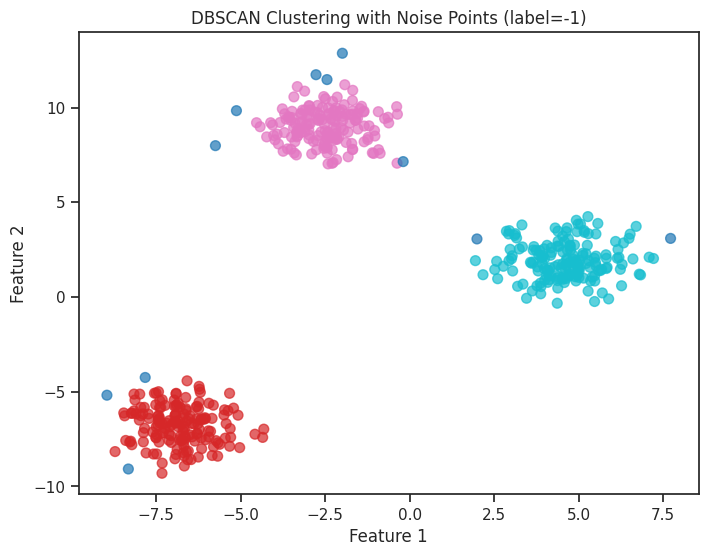

In [32]:
#47 Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count

# 1️⃣ Import libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

# 2️⃣ Generate noisy blobs
X, y_true = make_blobs(n_samples=500, n_features=2, centers=3, cluster_std=1.0, random_state=42)
print("Shape of generated data:", X.shape)

# 3️⃣ Apply DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(X)

# 4️⃣ Identify clusters and noise
# In DBSCAN, label -1 indicates noise
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print(f"Number of clusters found by DBSCAN: {n_clusters}")
print(f"Number of noise points identified by DBSCAN: {n_noise}")

# 5️⃣ Optional: visualize the clusters and noise
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab10', s=50, alpha=0.7)
plt.title("DBSCAN Clustering with Noise Points (label=-1)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Original data shape: (1797, 64)


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Shape after t-SNE: (1797, 2)


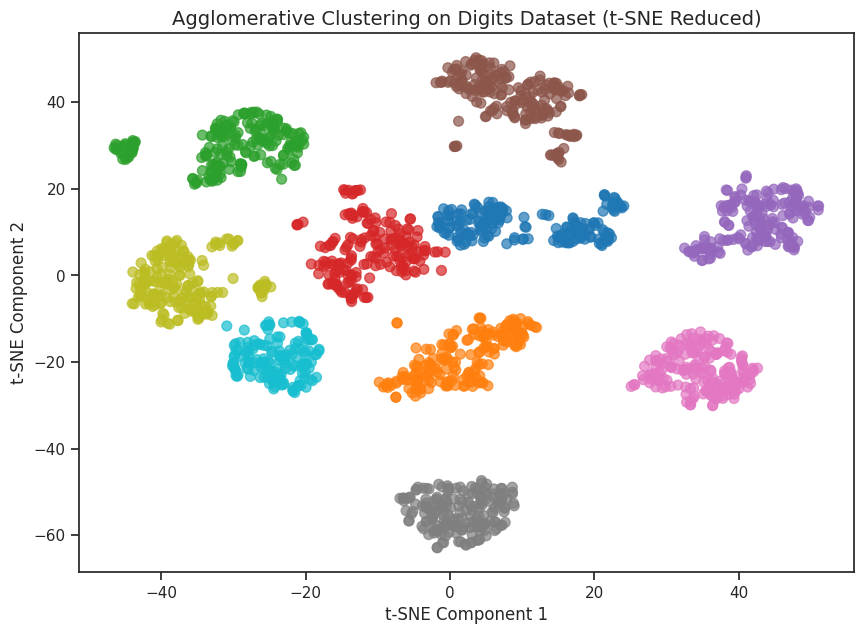

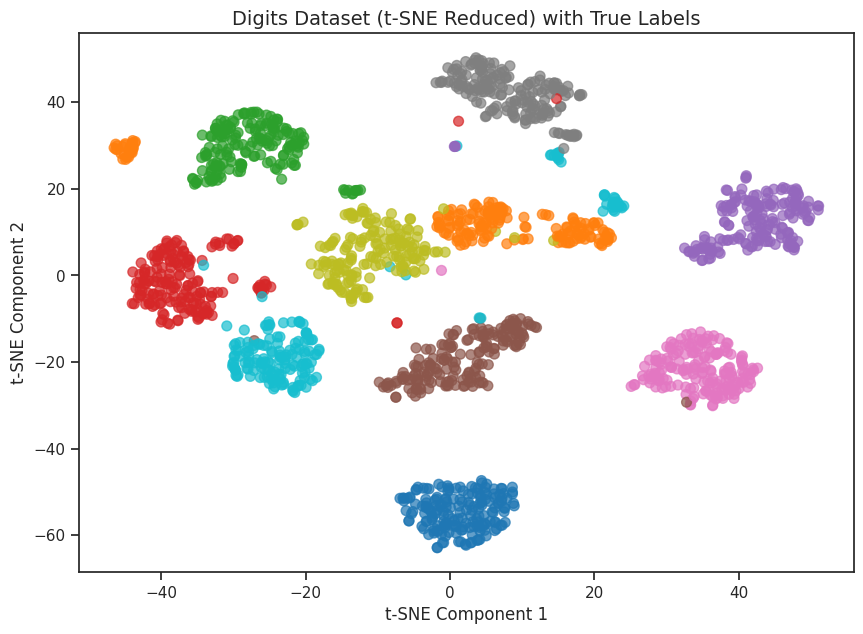

In [33]:
#48 Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters

# 1️⃣ Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# 2️⃣ Load Digits dataset
digits = load_digits()
X = digits.data
y_true = digits.target
print("Original data shape:", X.shape)

# 3️⃣ Reduce dimensions using t-SNE (2D)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)
print("Shape after t-SNE:", X_tsne.shape)

# 4️⃣ Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=10)  # Digits dataset has 10 classes
cluster_labels = agglo.fit_predict(X_tsne)

# 5️⃣ Prepare DataFrame for visualization
df = pd.DataFrame(X_tsne, columns=['tSNE1', 'tSNE2'])
df['Cluster'] = cluster_labels
df['TrueLabel'] = y_true
df.head()

# 6️⃣ 2D Scatter plot: Clusters from Agglomerative Clustering
plt.figure(figsize=(10,7))
plt.scatter(df['tSNE1'], df['tSNE2'], c=df['Cluster'], cmap='tab10', s=50, alpha=0.7)
plt.title("Agglomerative Clustering on Digits Dataset (t-SNE Reduced)", fontsize=14)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

# 7️⃣ Optional: 2D Scatter plot with True Labels
plt.figure(figsize=(10,7))
plt.scatter(df['tSNE1'], df['tSNE2'], c=df['TrueLabel'], cmap='tab10', s=50, alpha=0.7)
plt.title("Digits Dataset (t-SNE Reduced) with True Labels", fontsize=14)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()
